# Jinteki.net Player Stats

Import useful packages

In [1]:
import Pkg; 
Pkg.add("StatsPlots"); 
Pkg.add("CSV");
Pkg.add("DataFrames");
Pkg.add("DataFramesMeta");
Pkg.add("StatsBase");
Pkg.add(url="https://github.com/jwarwick/Ranking.jl");

using StatsBase;
using CSV;
using DataFrames;
using DataFramesMeta;
using StatsPlots;
using Ranking;


    Updating registry at `/opt/julia/registries/General`
   Resolving package versions...
  No Changes to `/opt/julia/environments/v1.6/Project.toml`
  No Changes to `/opt/julia/environments/v1.6/Manifest.toml`
   Resolving package versions...
  No Changes to `/opt/julia/environments/v1.6/Project.toml`
  No Changes to `/opt/julia/environments/v1.6/Manifest.toml`
   Resolving package versions...
  No Changes to `/opt/julia/environments/v1.6/Project.toml`
  No Changes to `/opt/julia/environments/v1.6/Manifest.toml`
   Resolving package versions...
  No Changes to `/opt/julia/environments/v1.6/Project.toml`
  No Changes to `/opt/julia/environments/v1.6/Manifest.toml`
   Resolving package versions...
  No Changes to `/opt/julia/environments/v1.6/Project.toml`
  No Changes to `/opt/julia/environments/v1.6/Manifest.toml`
    Updating git-repo `https://github.com/jwarwick/Ranking.jl`
   Resolving package versions...
  No Changes to `/opt/julia/environments/v1.6/Project.toml`
  No Changes to `

## Load the data

In [2]:
df = DataFrame(CSV.File("20210720_games.csv"))

,date,time,turn,room,format,winner,reason,corp
,Int64,Int64,Int64?,String,String,String?,String?,String?
1,20210720,3,missing,casual,standard,missing,missing,MirrorMorph: Endless Iteration
2,20210720,5,missing,casual,standard,missing,missing,"SYNC: Everything, Everywhere"
3,20210720,7,missing,casual,standard,missing,missing,Pālanā Foods: Sustainable Growth
4,20210720,10,missing,casual,startup,missing,missing,Jinteki: Restoring Humanity
5,20210720,12,missing,casual,startup,missing,missing,MirrorMorph: Endless Iteration
6,20210720,14,missing,casual,startup,missing,missing,NBN: Reality Plus
7,20210720,17,missing,casual,standard,missing,missing,MirrorMorph: Endless Iteration
8,20210720,11,12,casual,startup,corp,Agenda,GameNET: Where Dreams are Real
9,20210720,6,8,casual,standard,corp,Flatline,Jemison Astronautics: Sacrifice. Audacity. Success.


In [3]:
describe(df)

,variable,mean,min
,Symbol,Union…,Any
1,date,2.02068e7,20200720
2,time,449.145,0
3,turn,12.4033,0
4,room,,casual
5,format,,casual
6,winner,,corp
7,reason,,Agenda
8,corp,,Acme Consulting: The Truth You Need
9,runner,,419: Amoral Scammer


In [4]:
complete = df[completecases(df), :]
disallowmissing!(complete)
size(complete)

(299536, 11)

## Map username hashes to player ids

In [5]:
unique_corp_users = unique(complete[:,:corpusernamehash])
unique_runner_users = unique(complete[:,:runnerusernamehash])
unique_users = unique(vcat(unique_corp_users, unique_runner_users))

user_lookup = Dict{String, Int}()
reverse_user_lookup = Dict{Int, String}()
for (index, value) in enumerate(unique_users)
    user_lookup[value] = index
    reverse_user_lookup[index] = value
end

In [6]:
corp_users = complete[:, :corpusernamehash]
corp_user_nums = Vector{Int}()
for value in corp_users
    push!(corp_user_nums, user_lookup[value])
end
insertcols!(complete, 4, :corpuserid => corp_user_nums)

,date,time,turn,corpuserid,room,format,winner,reason,corp
,Int64,Int64,Int64,Int64,String,String,String,String,String
1,20210720,11,12,1,casual,startup,corp,Agenda,GameNET: Where Dreams are Real
2,20210720,6,8,2,casual,standard,corp,Flatline,Jemison Astronautics: Sacrifice. Audacity. Success.
3,20210720,21,12,3,casual,startup,corp,Agenda,Haas-Bioroid: Precision Design
4,20210720,22,10,4,casual,standard,corp,Agenda,Jinteki: Restoring Humanity
5,20210720,15,15,5,casual,standard,runner,Agenda,Asa Group: Security Through Vigilance
6,20210720,27,19,6,casual,standard,corp,Agenda,MirrorMorph: Endless Iteration
7,20210720,26,14,7,casual,eternal,runner,Decked,Seidr Laboratories: Destiny Defined
8,20210720,22,13,8,casual,startup,corp,Agenda,NBN: Reality Plus
9,20210720,23,14,9,casual,standard,runner,Agenda,Haas-Bioroid: Precision Design


In [7]:
runner_users = complete[:, :runnerusernamehash]
runner_user_nums = Vector{Int}()
for value in runner_users
    push!(runner_user_nums, user_lookup[value])
end
insertcols!(complete, 4, :runneruserid => runner_user_nums)

,date,time,turn,runneruserid,corpuserid,room,format,winner
,Int64,Int64,Int64,Int64,Int64,String,String,String
1,20210720,11,12,11,1,casual,startup,corp
2,20210720,6,8,7287,2,casual,standard,corp
3,20210720,21,12,24,3,casual,startup,corp
4,20210720,22,10,32,4,casual,standard,corp
5,20210720,15,15,20,5,casual,standard,runner
6,20210720,27,19,7931,6,casual,standard,corp
7,20210720,26,14,16,7,casual,eternal,runner
8,20210720,22,13,23,8,casual,startup,corp
9,20210720,23,14,2,9,casual,standard,runner


## Compute wins and losses

In [8]:
outcomes = complete[:, :winner]
runner_wins = Vector{Float32}()
for value in outcomes
    if "runner" == value
        push!(runner_wins, 1.0)
    else
        push!(runner_wins, 0.0)
    end
end
insertcols!(complete, 4, :runnerwins => runner_wins)

,date,time,turn,runnerwins,runneruserid,corpuserid,room,format
,Int64,Int64,Int64,Float32,Int64,Int64,String,String
1,20210720,11,12,0.0,11,1,casual,startup
2,20210720,6,8,0.0,7287,2,casual,standard
3,20210720,21,12,0.0,24,3,casual,startup
4,20210720,22,10,0.0,32,4,casual,standard
5,20210720,15,15,1.0,20,5,casual,standard
6,20210720,27,19,0.0,7931,6,casual,standard
7,20210720,26,14,1.0,16,7,casual,eternal
8,20210720,22,13,0.0,23,8,casual,startup
9,20210720,23,14,1.0,2,9,casual,standard


In [46]:
record = zeros(Int, length(keys(user_lookup)), 5)
runner_win = 1
runner_loss = 2
corp_win = 3
corp_loss = 4
pid = 5

for idx=1:size(record, 1)
    record[idx, pid] = idx
end

for row in eachrow(complete)
    if row.runnerwins == 1.0
        record[row.runneruserid, runner_win] += 1
        record[row.corpuserid, corp_loss] += 1
    else
        record[row.runneruserid, runner_loss] += 1
        record[row.corpuserid, corp_win] += 1
    end
end

winloss = DataFrame(record, [:runnerwins, :runnerlosses, :corpwins, :corplosses, :pid])
@eachrow! winloss begin
    @newcol :totalgames::Vector{Int}
    :totalgames = :runnerwins + :runnerlosses + :corpwins + :corplosses
end
winloss

,runnerwins,runnerlosses,corpwins,corplosses,pid,totalgames
,Int64,Int64,Int64,Int64,Int64,Int64
1,479,363,596,263,1,1701
2,1490,1345,757,409,2,4001
3,0,18,3,4,3,25
4,4,1,5,3,4,13
5,207,380,449,394,5,1430
6,1,1,48,51,6,101
7,273,343,426,292,7,1334
8,45,34,118,78,8,275
9,198,111,188,72,9,569


In [28]:
describe(winloss.totalgames)

Summary Stats:
Length:         9633
Missing Count:  0
Mean:           62.189557
Minimum:        1.000000
1st Quartile:   2.000000
Median:         6.000000
3rd Quartile:   26.000000
Maximum:        4889.000000
Type:           Int64


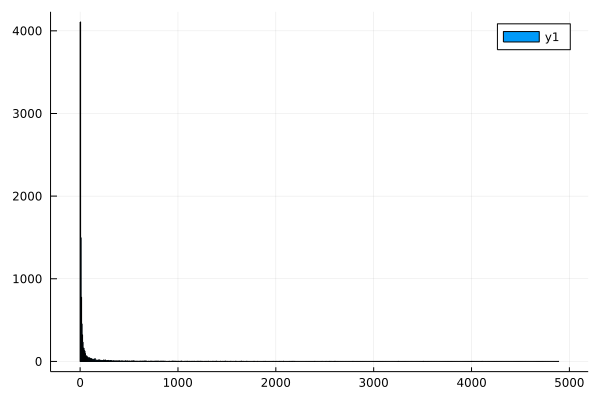

In [29]:
histogram(winloss.totalgames)

In [30]:
@orderby(winloss, :totalgames * -1)

,runnerwins,runnerlosses,corpwins,corplosses,pid,totalgames
,Int64,Int64,Int64,Int64,Int64,Int64
1,1969,1138,1276,506,224,4889
2,427,1617,812,1253,68,4109
3,1490,1345,757,409,2,4001
4,1108,1620,438,343,113,3509
5,1133,766,1012,340,111,3251
6,354,1106,808,517,38,2785
7,564,677,871,497,248,2609
8,871,507,909,308,153,2595
9,369,917,653,621,188,2560


## Compute ELO

In [32]:
elo_data = select(complete, :runneruserid, :corpuserid, :winner, :runnerwins)

,runneruserid,corpuserid,winner,runnerwins
,Int64,Int64,String,Float32
1,11,1,corp,0.0
2,7287,2,corp,0.0
3,24,3,corp,0.0
4,32,4,corp,0.0
5,20,5,runner,1.0
6,7931,6,corp,0.0
7,16,7,runner,1.0
8,23,8,corp,0.0
9,2,9,runner,1.0


In [33]:
n_players = length(keys(user_lookup))

9633

In [34]:
game_data = Matrix(@select(elo_data, :runneruserid, :corpuserid, :runnerwins))

299536×3 Matrix{Float32}:
   11.0     1.0  0.0
 7287.0     2.0  0.0
   24.0     3.0  0.0
   32.0     4.0  0.0
   20.0     5.0  1.0
 7931.0     6.0  0.0
   16.0     7.0  1.0
   23.0     8.0  0.0
    2.0     9.0  1.0
   27.0    10.0  1.0
   24.0     5.0  1.0
  768.0    11.0  1.0
 7932.0    12.0  0.0
    ⋮            
 3347.0   730.0  0.0
 1254.0  2975.0  1.0
  278.0  5588.0  1.0
   67.0  1876.0  1.0
 3146.0  1797.0  0.0
 9614.0  7430.0  0.0
 9633.0  7930.0  0.0
 1654.0   303.0  0.0
 3643.0     8.0  1.0
  106.0  4451.0  1.0
 7539.0   635.0  0.0
  150.0  3887.0  1.0

In [35]:
elo = Ranking.fit(Elo, game_data, n_players)

Elo([1818.8374730942173, 1757.5515049875296, 1411.676249088189, 1676.2088135751035, 1640.9481885770485, 1560.0319047441233, 1734.1391113386321, 1713.39696586321, 1731.1171181321859, 1388.5973568998545  …  1591.643046048387, 1584.1935401208711, 1584.0, 1584.0, 1568.67111188099, 1580.6403992234661, 1594.3367712487304, 1583.2349247622346, 1616.0, 1584.0])

In [36]:
describe(elo.r)

Summary Stats:
Length:         9633
Missing Count:  0
Mean:           1600.004293
Minimum:        1236.936817
1st Quartile:   1569.469502
Median:         1595.206796
3rd Quartile:   1623.172761
Maximum:        2003.558391
Type:           Float64


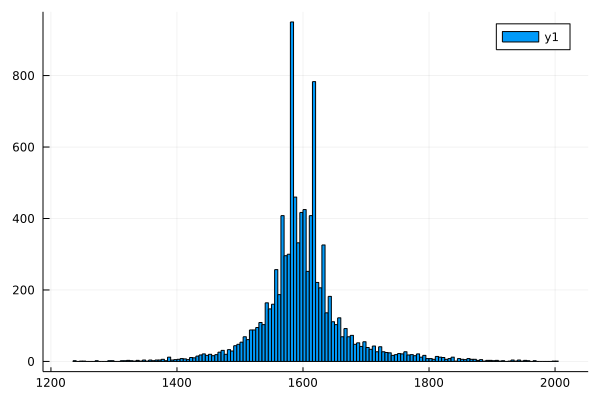

In [37]:
histogram(elo.r)

In [38]:
@eachrow! winloss begin
    @newcol :elo::Vector{Float64}
    :elo = elo.r[:pid]
end

,runnerwins,runnerlosses,corpwins,corplosses,pid,totalgames,elo
,Int64,Int64,Int64,Int64,Int64,Int64,Float64
1,479,363,596,263,1,1701,1818.84
2,1490,1345,757,409,2,4001,1757.55
3,0,18,3,4,3,25,1411.68
4,4,1,5,3,4,13,1676.21
5,207,380,449,394,5,1430,1640.95
6,1,1,48,51,6,101,1560.03
7,273,343,426,292,7,1334,1734.14
8,45,34,118,78,8,275,1713.4
9,198,111,188,72,9,569,1731.12


In [39]:
@orderby(winloss, :elo * -1)

,runnerwins,runnerlosses,corpwins,corplosses,pid,totalgames,elo
,Int64,Int64,Int64,Int64,Int64,Int64,Float64
1,16,1,30,7,7652,54,2003.56
2,582,225,519,156,67,1482,1995.23
3,0,0,917,316,799,1233,1969.08
4,56,19,61,12,6982,148,1965.17
5,400,134,664,108,151,1306,1958.64
6,42,15,127,39,2275,223,1958.0
7,62,38,175,33,1986,308,1952.0
8,144,47,63,18,7061,272,1950.92
9,22,6,27,13,4533,68,1950.86


## Limit by number of games played

In [40]:
enoughgames = @subset(winloss, :totalgames .>= 200)

,runnerwins,runnerlosses,corpwins,corplosses,pid,totalgames,elo
,Int64,Int64,Int64,Int64,Int64,Int64,Float64
1,479,363,596,263,1,1701,1818.84
2,1490,1345,757,409,2,4001,1757.55
3,207,380,449,394,5,1430,1640.95
4,273,343,426,292,7,1334,1734.14
5,45,34,118,78,8,275,1713.4
6,198,111,188,72,9,569,1731.12
7,38,89,56,87,10,270,1388.6
8,111,253,233,313,11,910,1554.64
9,25,82,936,554,13,1597,1783.99


In [41]:
describe(enoughgames.totalgames)

Summary Stats:
Length:         690
Missing Count:  0
Mean:           620.724638
Minimum:        200.000000
1st Quartile:   274.250000
Median:         414.500000
3rd Quartile:   768.250000
Maximum:        4889.000000
Type:           Int64


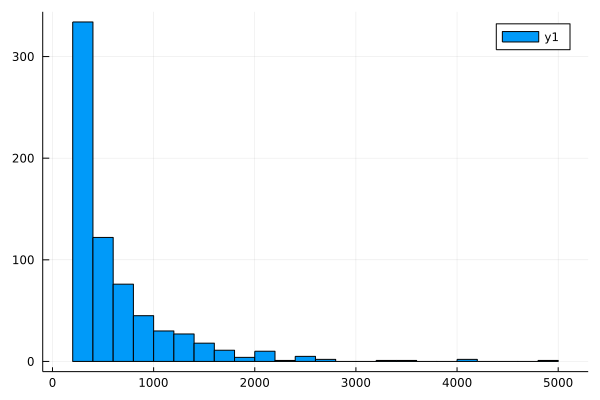

In [42]:
histogram(enoughgames.totalgames)

In [43]:
describe(enoughgames.elo)

Summary Stats:
Length:         690
Missing Count:  0
Mean:           1659.262883
Minimum:        1239.417507
1st Quartile:   1577.109214
Median:         1657.948609
3rd Quartile:   1753.443420
Maximum:        1995.227754
Type:           Float64


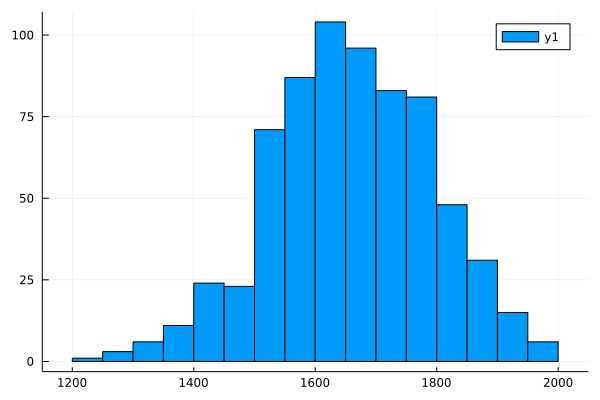

In [44]:
histogram(enoughgames.elo)